## The Sparks Foundation - Data Science & Business Analytics Internship

### Task 1: Prediction using supervised ML

### Name : Wifek FOUZAI

In this task, we are going to predict the percentage of marks that a student is expected to score based upon the number of hours they studied using the Linear Regression.

### 1. Data understanding

In [3]:
#Import all the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Read dataset from remote link
data = "http://bit.ly/w-data"
data = pd.read_csv(data)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
#Observe the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [14]:
#Observe the dataset
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
#Describe the dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
#Info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
#Number of columns and rows 
data.shape

(25, 2)

In [20]:
#Check null or missings values  
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

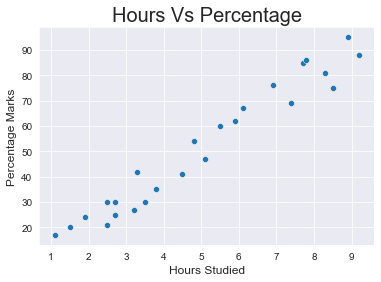

In [25]:
#Visualize the data
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Hours Vs Percentage',size=20)
plt.ylabel('Percentage Marks', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the graph above, we can observe that there is a linear relation between "hours studied" and "percentage Marks".

In [28]:
#correlation values
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


The variables are positively correlated.

### 2. Data Preparation

In [30]:
#Divide the data into X (inputs) and y (outputs) using iloc
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [61]:
#Spliting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### 3. Modeling

In [62]:
#Train the model
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [63]:
#Predic the percentage of marks
y_pred = model.predict(X_test)

In [64]:
#Compare the predicted marks with the actual marks
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


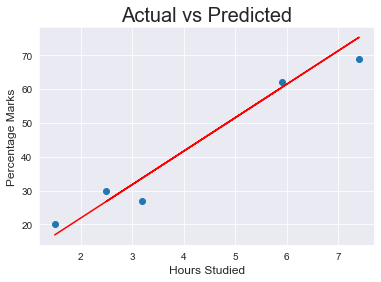

In [66]:
#Visualize the comparision
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='red')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Percentage Marks', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [67]:
#Test with our own data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a student studies for",hours,"hours is",own_pred[0])

The predicted score if a student studies for 9.25 hours is 93.69173248737538


### 3. Evaluation

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score : ',r2_score(y_test,y_pred))

Mean Absolute Error :  4.183859899002975
R2 score :  0.9454906892105356
